In [2]:
from functions.dataProcessing import *
import seaborn

df = readData()

In [3]:
def feature(feature, t=True, df=df):
    if t:
        return [x[0] for x in df[feature]]
    else:
        return [x[-1] for x in df[feature]]
    
# lines connecting two swarmplots
def lines(d, ax, ns):
    locs1 = ax.get_children()[ns[0]].get_offsets()
    locs2 = ax.get_children()[ns[1]].get_offsets()
    locs = locs2[np.argsort(d[ns[1]]).argsort()][np.argsort(d[ns[0]])]
    for i in range(locs1.shape[0]):
        plt.plot([locs1[i, 0], locs[i, 0]], [locs1[i, 1], locs[i, 1]], color="black", alpha=0.05)

In [4]:
d = [[np.mean(x[0:200]) for x in df["zscaled"]], [np.mean(x[200:400]) for x in df["zscaled"]], feature("environment")*2]
smooth = [[d[0][i] for i in range(len(d[0])) if d[2][i]==0],[d[1][i] for i in range(len(d[1])) if d[2][i]==0]]
rough = [[d[0][i] for i in range(len(d[0])) if d[2][i]==1],[d[1][i] for i in range(len(d[1])) if d[2][i]==1]]
d = [smooth[1], smooth[0], rough[1], rough[0]]
data = {"P_correct": smooth[1]+smooth[0]+rough[1]+rough[0],
    "context": ["Conceptual"]*len(smooth[1]) + ["Spatial"]*len(smooth[0]) + ["ConceptuaI"]*len(rough[1]) + ["SpatiaI"]*len(rough[0]),
    "c": ["Conceptual"]*len(smooth[1]) + ["Spatial"]*len(smooth[0]) + ["Conceptual"]*len(rough[1]) + ["Spatial"]*len(rough[0])}


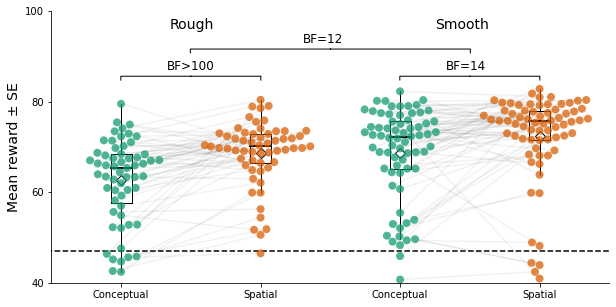

In [5]:
# Boxplot with pyplot
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()
plt.ylim((40,100))

plt.boxplot(d, showfliers=False, positions=range(4), widths=[0.15,0.15,0.15,0.15], medianprops={'color': 'black','lw': 2}, showcaps=False)
means = [np.mean(d[0]), np.mean(d[1]), np.mean(d[2]), np.mean(d[3])]
plt.plot([0,1,2,3], means, 'D', lw=0, ms=7, mec="black", mfc="white")

ax.set_yticks([40,60,80,100])

# Swarmplot with seaborn
seaborn.swarmplot(data=data , x="context", y="P_correct", palette=['#159c73','#d95f05'], size=8, alpha=0.75, hue="c")
plt.legend([],[], frameon=False)
seaborn.despine()
plt.ylabel("Mean reward ± SE", fontsize=14)
lines(d, ax, [0,1])
lines(d, ax, [2,3])

ax.text(0.35,96, "Rough", fontsize=14) 
ax.text(2.25,96, "Smooth", fontsize=14)  

ax.text(0.33,87, "BF>100", fontsize=12)  
ax.text(2.33,87, "BF=14", fontsize=12) 
ax.text(1.3,93, "BF=12", fontsize=12)  

ax.annotate('', xy=(0.5, 0.86), xytext=(0.5, 0.861), xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=14.0, lengthB=0.4', lw=1.0))

ax.annotate('', xy=(0.25, 0.76), xytext=(0.25, 0.761), xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=7, lengthB=0.4', lw=1.0))

ax.annotate('', xy=(0.75, 0.76), xytext=(0.75, 0.761), xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=7, lengthB=0.4', lw=1.0))
randomdata = pd.read_csv("rationalModels/random.csv", sep=",")
rndMean = np.mean(randomdata["meanReward"])
plt.plot([-1,100],[rndMean,rndMean], "--", c="black")
plt.show()

In [6]:
d = [[np.mean(x[0:200]) for x in df["zscaled"]], [np.mean(x[200:400]) for x in df["zscaled"]], feature("environment")*2]
rough = [[d[0][i] for i in range(len(d[0])) if d[2][i]==0],[d[1][i] for i in range(len(d[1])) if d[2][i]==0]]
smooth = [[d[0][i] for i in range(len(d[0])) if d[2][i]==1],[d[1][i] for i in range(len(d[1])) if d[2][i]==1]]

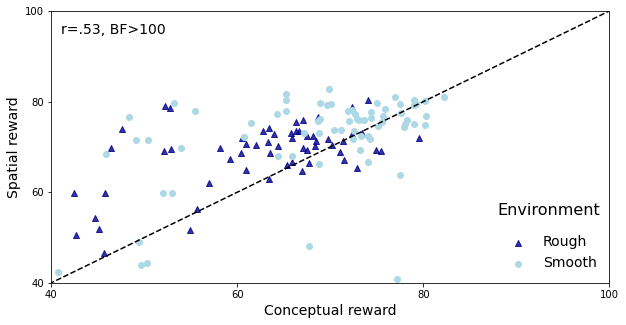

In [7]:
fig, ax = plt.subplots()
plt.xlim((40,100))
plt.ylim((40,100))
ax.set_yticks([40,60,80,100])
ax.set_xticks([40,60,80,100])
plt.xlabel("Conceptual reward", fontsize=14)
plt.ylabel("Spatial reward", fontsize=14)
plt.scatter(rough[1],rough[0], c="darkblue", marker="^", alpha=0.8)
plt.scatter(smooth[1],smooth[0], c="lightblue")
plt.legend(["Rough","Smooth"], loc="lower right", frameon=False, prop={'size': 14})
plt.plot([0,100],[0,100], "--", c="black")
plt.text(88, 55, "Environment", fontsize=16)
plt.text(41,95, "r=.53, BF>100", fontsize=14)

plt.show()

In [8]:
d = [[np.mean(x[0:200]) for x in df["zscaled"]], [np.mean(x[200:400]) for x in df["zscaled"]], feature("contextOrder")*2]
spatial = [[d[0][i] for i in range(len(d[0])) if d[2][i]==0],[d[1][i] for i in range(len(d[1])) if d[2][i]==0]]
conceptual = [[d[0][i] for i in range(len(d[0])) if d[2][i]==1],[d[1][i] for i in range(len(d[1])) if d[2][i]==1]]
d = [conceptual[1], conceptual[0], spatial[1], spatial[0]]
data = {"P_correct": conceptual[1]+conceptual[0]+spatial[1]+spatial[0],
    "context": ["Conceptual"]*len(conceptual[1]) + ["Spatial"]*len(conceptual[0]) + ["ConceptuaI"]*len(spatial[1]) + ["SpatiaI"]*len(spatial[0]),
    "c": ["Conceptual"]*len(conceptual[1]) + ["Spatial"]*len(conceptual[0]) + ["Conceptual"]*len(spatial[1]) + ["Spatial"]*len(spatial[0])}

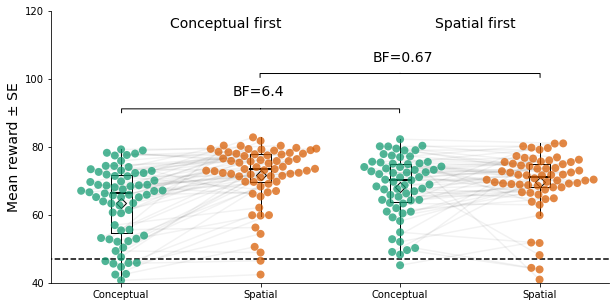

In [9]:
# Boxplot with pyplot
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()
plt.ylim((40,120))

plt.boxplot(d, showfliers=False, positions=range(4), widths=[0.15,0.15,0.15,0.15], medianprops={'color': 'black','lw': 2}, showcaps=False)
means = [np.mean(d[0]), np.mean(d[1]), np.mean(d[2]), np.mean(d[3])]
plt.plot([0,1,2,3], means, 'D', lw=0, ms=7, mec="black", mfc="white")

# Swarmplot with seaborn
seaborn.swarmplot(data=data , x="context", y="P_correct", palette=['#159c73','#d95f05'], size=8, alpha=0.75, hue="c")
plt.legend([],[], frameon=False)
seaborn.despine()
plt.ylabel("Mean reward ± SE", fontsize=14)
ax.set_yticks([40,60,80,100,120])
lines(d, ax, [0,1])
lines(d, ax, [2,3])
    
ax.text(0.35,115, "Conceptual first", fontsize=14) 
ax.text(2.25,115, "Spatial first", fontsize=14)  

ax.text(0.8,95, "BF=6.4", fontsize=14)  
ax.text(1.8,105, "BF=0.67", fontsize=14) 

ax.annotate('', xy=(0.375, 0.64), xytext=(0.375, 0.641), xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=13.9, lengthB=0.4', lw=1.0))

ax.annotate('', xy=(0.625, 0.77), xytext=(0.625, 0.771), xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=14, lengthB=0.4', lw=1.0))

randomdata = pd.read_csv("rationalModels/random.csv", sep=",")
rndMean = np.mean(randomdata["meanReward"])
plt.plot([-1,100],[rndMean,rndMean], "--", c="black")
plt.show()

In [10]:
d = [[x[0:200] for x in df["zscaled"]], [x[200:400] for x in df["zscaled"]], feature("environment")*2]
smooth = [[d[0][i] for i in range(len(d[0])) if d[2][i]==0],[d[1][i] for i in range(len(d[1])) if d[2][i]==0]]
rough = [[d[0][i] for i in range(len(d[0])) if d[2][i]==1],[d[1][i] for i in range(len(d[1])) if d[2][i]==1]]

def f1(data):
    return np.asmatrix([z for l in [[x[(y)*20:(y+1)*20] for y in range(10)] for x in data] for z in l]).transpose().tolist()

d1 = f1(smooth[0])
d2 = f1(smooth[1])
s = {
    "time": [y for l in [[x]*len(d2[0]) for x in range(20)] for y in l] + [y for l in [[x]*len(d1[0]) for x in range(20)] for y in l],
    "reward": [x for l in d2 for x in l] + [x for l in d1 for x in l],
    "type": ["Conceptual"]*len(d2[0])*20 + ["Spatial"]*len(d1[0])*20
}
d1 = f1(rough[0])
d2 = f1(rough[1])
r = {
    "time": [y for l in [[x]*len(d2[0]) for x in range(20)] for y in l] + [y for l in [[x]*len(d1[0]) for x in range(20)] for y in l],
    "reward": [x for l in d2 for x in l] + [x for l in d1 for x in l],
    "type": ["Conceptual"]*len(d2[0])*20 + ["Spatial"]*len(d1[0])*20
}

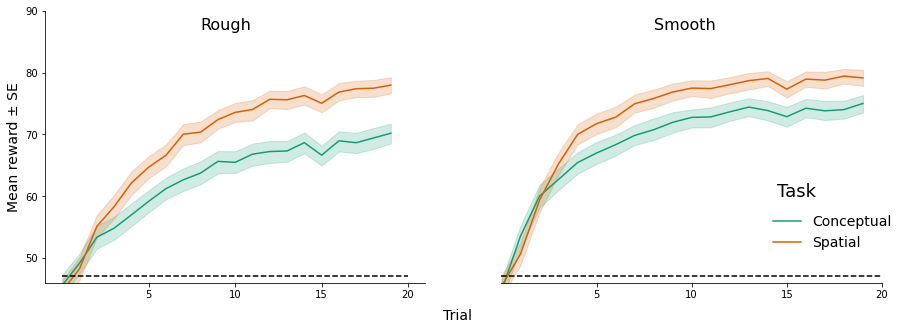

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[1].set_yticks([])
axes[0].set_yticks([50,60,70,80,90])
axes[0].set_xticks([5,10,15,20])
axes[1].set_xticks([5,10,15,20])
plt.ylim((46,90))
plt.xlim((0,20))
axes[0].set_ylabel("Mean reward ± SE", fontsize=14)
seaborn.lineplot(data=s, x="time", y="reward", hue="type", palette=['#159c73','#d95f05'], ax=axes[0])
seaborn.lineplot(data=r, x="time", y="reward", hue="type", palette=['#159c73','#d95f05'], ax=axes[1])
axes[0].legend([],[], frameon=False)
axes[1].legend([],[], frameon=False)
axes[1].legend(["Conceptual","Spatial"], loc=(0.7,0.1), frameon=False, prop={'size': 14})
axes[0].plot([0,20],[rndMean,rndMean], "--", c="black")
axes[1].plot([0,20],[rndMean,rndMean], "--", c="black")
seaborn.despine(bottom = False, left = False, ax=axes[0])
seaborn.despine(bottom = False, ax=axes[1])
axes[1].get_yaxis().set_visible(False)
axes[1].spines["left"].set_visible(False)

axes[0].text(8, 87, "Rough", fontsize=16) 
axes[1].text(8, 87, "Smooth", fontsize=16)  

axes[1].text(14.5, 60, "Task", fontsize=18) 
axes[0].text(22, 40, "Trial", fontsize=14) 

plt.show()

In [12]:
# Load data obtained from 10,000 simulations
gprdf = pd.read_csv("simulated_data.csv")

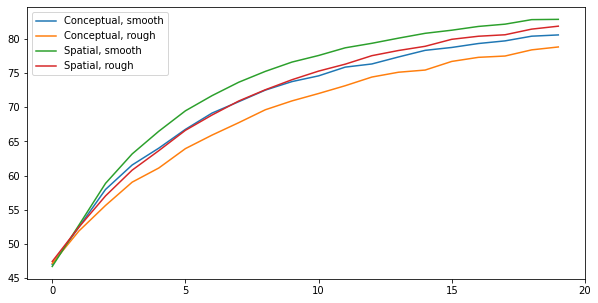

In [13]:
fig, ax = plt.subplots()
plt.plot(range(20), gprdf["meanReward"][0:20])
plt.plot(range(20), gprdf["meanReward"][20:40])
plt.plot(range(20), gprdf["meanReward"][40:60])
plt.plot(range(20), gprdf["meanReward"][60:80])
ax.set_xticks([0, 5, 10, 15, 20])
plt.legend(["Conceptual, smooth", "Conceptual, rough","Spatial, smooth", "Spatial, rough"])
plt.show()